In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Example datasets
file1 = '/content/drive/MyDrive/Seunwen/HAR_data/Laying.csv'
file2 = '/content/drive/MyDrive/Seunwen/HAR_data/Laying2.csv'
file3 = '/content/drive/MyDrive/Seunwen/HAR_data/Walking1.csv'
file4 = '/content/drive/MyDrive/Seunwen/HAR_data/lay-stand.csv'
file5 = '/content/drive/MyDrive/Seunwen/HAR_data/sit-stand.csv'
file6 = '/content/drive/MyDrive/Seunwen/HAR_data/sit-stand2.csv'
file7 = '/content/drive/MyDrive/Seunwen/HAR_data/sit-stand3.csv'
file8 = '/content/drive/MyDrive/Seunwen/HAR_data/sit-stand4.csv'
file9 = '/content/drive/MyDrive/Seunwen/HAR_data/sit-stand5.csv'
filea = '/content/drive/MyDrive/Seunwen/HAR_data/walking2.csv'
fileb = '/content/drive/MyDrive/Seunwen/HAR_data/walking3.csv'
filec = '/content/drive/MyDrive/Seunwen/HAR_data/walking4.csv'
filed = '/content/drive/MyDrive/Seunwen/HAR_data/walking5.csv'
filee = '/content/drive/MyDrive/Seunwen/HAR_data/walking6.csv'

In [3]:
# Load datasets into dataframes
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)
df5 = pd.read_csv(file5)
df6 = pd.read_csv(file6)
df7 = pd.read_csv(file7)
df8 = pd.read_csv(file8)
df9 = pd.read_csv(file9)
dfa = pd.read_csv(filea)
dfb = pd.read_csv(fileb)
dfc = pd.read_csv(filec)
dfd = pd.read_csv(filed)
dfe = pd.read_csv(filee)

In [4]:
# Example dataframes: Replace these with your actual dataframes
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9, dfa, dfb, dfc, dfd, dfe]

# Concatenate all dataframes vertically
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataframe to a single file
output_file = 'merged_dataset.csv'
merged_df.to_csv(output_file, index=False)

print(f"Merged dataset saved to {output_file}")

Merged dataset saved to merged_dataset.csv


In [5]:
dataset = pd.read_csv('/content/merged_dataset.csv')

In [6]:
dataset

,acceleration_X,acceleration_Y,acceleration_Z,rotation_X,rotation_Y,rotation_Z,activity
0,-0.97,2.33,-2.94,-0.07,0.04,-0.02,Laying
1,-0.98,2.35,-2.98,-0.02,0.06,-0.02,Laying
2,-0.92,2.28,-2.95,-0.05,0.05,-0.02,Laying
3,-0.90,2.19,-3.04,-0.23,-0.03,-0.03,Laying
4,-0.87,2.10,-3.05,-0.04,0.06,-0.02,Laying
...,...,...,...,...,...,...,...
5613,-1.46,-9.66,2.87,-3.08,-3.08,-3.20,Walking
5614,2.40,-5.86,-2.79,0.54,0.52,-0.02,Walking
5615,-0.13,-5.20,1.03,1.33,1.49,1.11,Walking
5616,-0.83,-5.16,1.30,1.34,1.54,1.51,Walking


In [7]:
dataset.shape

(5618, 7)

# *Data Preprocessing*

In [8]:
dataset.isnull()

,acceleration_X,acceleration_Y,acceleration_Z,rotation_X,rotation_Y,rotation_Z,activity
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5613,False,False,False,False,False,False,False
5614,False,False,False,False,False,False,False
5615,False,False,False,False,False,False,False
5616,False,False,False,False,False,False,False


In [9]:
# Check if there are any null values in the entire dataset
has_null = dataset.isnull().values.any()
print(f"Are there any null values? {has_null}")

null_counts = dataset.isnull().sum()
print("Null values in each column:")
print(null_counts)

Are there any null values? False
Null values in each column:
acceleration_X     0
 acceleration_Y    0
 acceleration_Z    0
 rotation_X        0
 rotation_Y        0
 rotation_Z        0
 activity          0
dtype: int64


In [10]:
# Setting the dependent and independent variables
X = dataset.iloc[:, 0:6]
X

,acceleration_X,acceleration_Y,acceleration_Z,rotation_X,rotation_Y,rotation_Z
0,-0.97,2.33,-2.94,-0.07,0.04,-0.02
1,-0.98,2.35,-2.98,-0.02,0.06,-0.02
2,-0.92,2.28,-2.95,-0.05,0.05,-0.02
3,-0.90,2.19,-3.04,-0.23,-0.03,-0.03
4,-0.87,2.10,-3.05,-0.04,0.06,-0.02
...,...,...,...,...,...,...
5613,-1.46,-9.66,2.87,-3.08,-3.08,-3.20
5614,2.40,-5.86,-2.79,0.54,0.52,-0.02
5615,-0.13,-5.20,1.03,1.33,1.49,1.11
5616,-0.83,-5.16,1.30,1.34,1.54,1.51


In [11]:
y = dataset.iloc[:, -1]
y

,activity
0,Laying
1,Laying
2,Laying
3,Laying
4,Laying
...,...
5613,Walking
5614,Walking
5615,Walking
5616,Walking


In [12]:
# Encode the target labels (convert activity names to numeric values)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 5, 5, 5])

In [13]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.05989843,  0.23574689, -0.34352069,  0.11253091,  0.01092785,
         0.01142537],
       [-0.06034535,  0.23668707, -0.34464365,  0.16011044,  0.02928964,
         0.01142537],
       [-0.05766387,  0.23339645, -0.34380143,  0.13156272,  0.02010875,
         0.01142537],
       ...,
       [-0.02235769, -0.1182294 , -0.23206721,  1.44475761,  1.34215788,
         0.2448803 ],
       [-0.05364164, -0.11634905, -0.22448725,  1.45427352,  1.38806236,
         0.32751921],
       [-0.14347128, -0.03831443, -0.25284191,  0.29333311, -1.80688971,
         0.12711985]])

# *Exploratory Data Analysis*

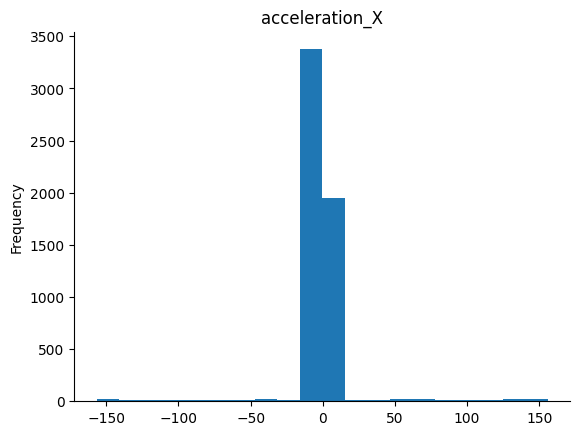

In [14]:
# Distribution for acceleration_x
dataset['acceleration_X'].plot(kind='hist', bins=20, title='acceleration_X')
plt.gca().spines[['top', 'right',]].set_visible(False)

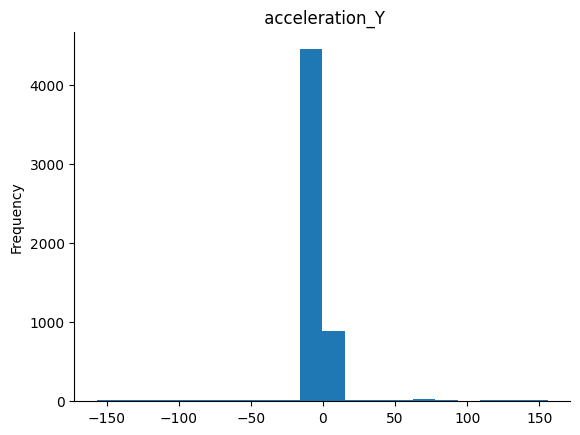

In [15]:
# Distribution for acceleration_Y
dataset[' acceleration_Y'].plot(kind='hist', bins=20, title=' acceleration_Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

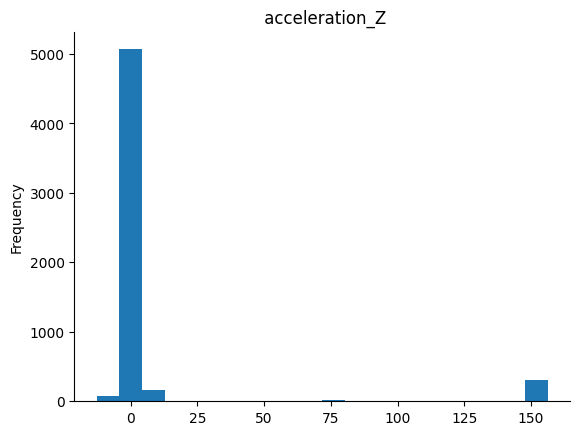

In [16]:
# Distribution for acceleration_Y
dataset[' acceleration_Z'].plot(kind='hist', bins=20, title=' acceleration_Z')
plt.gca().spines[['top', 'right',]].set_visible(False)

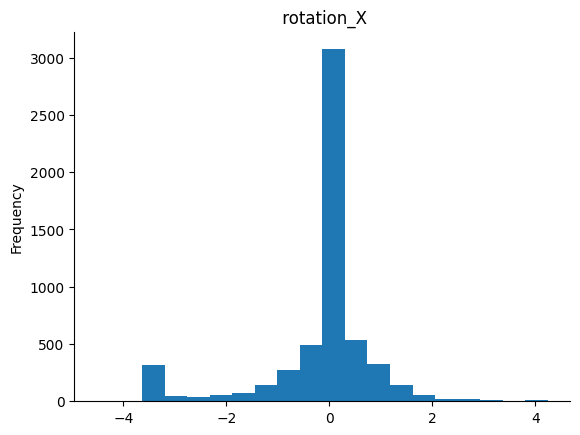

In [17]:
# Distribution for acceleration_Z
dataset[' rotation_X'].plot(kind='hist', bins=20, title=' rotation_X')
plt.gca().spines[['top', 'right',]].set_visible(False)

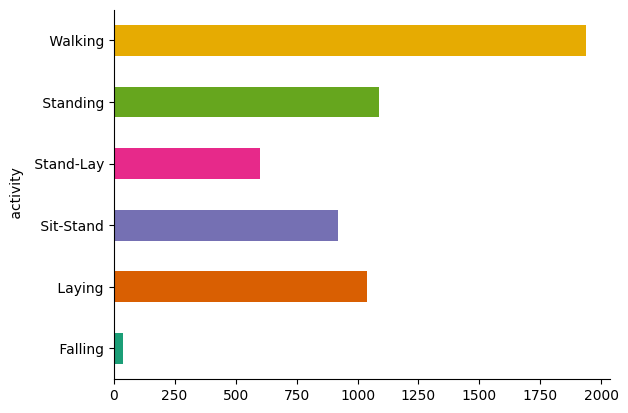

In [18]:
# Categorical distributions
dataset.groupby(' activity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

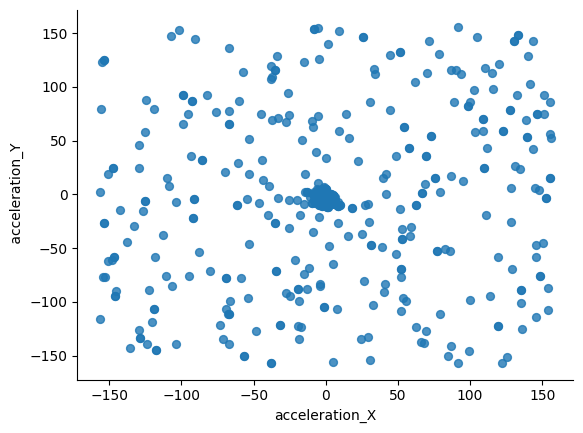

In [19]:
# 2-d distributions scatter plot graphy for acceleration_X and  acceleration_Y
dataset.plot(kind='scatter', x='acceleration_X', y=' acceleration_Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

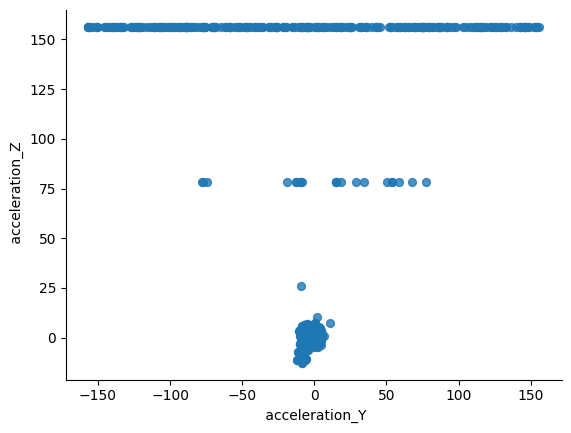

In [20]:
# 2-d distributions scatter plot graphy for  acceleration_Y and acceleration_Z
dataset.plot(kind='scatter', x=' acceleration_Y', y=' acceleration_Z', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

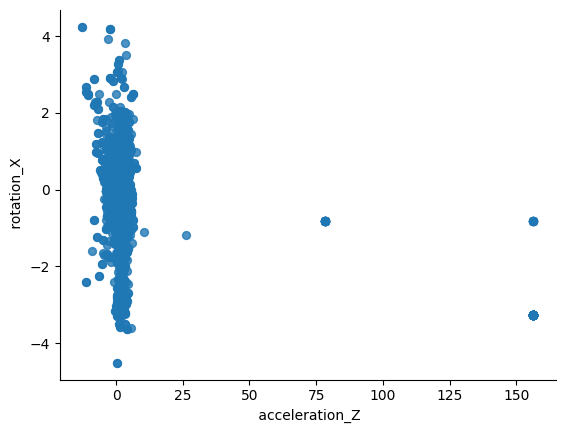

In [21]:
# 2-d distributions scatter plot graphy for  acceleration_X and acceleration_Z
dataset.plot(kind='scatter', x=' acceleration_Z', y=' rotation_X', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

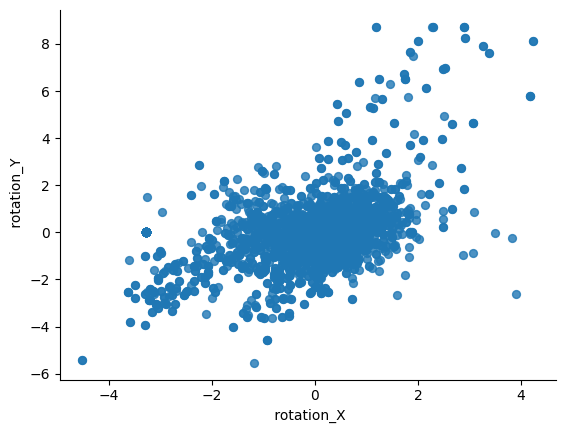

In [22]:
# 2-d distributions scatter plot graphy for  rotation_X and rotation_Y
dataset.plot(kind='scatter', x=' rotation_X', y=' rotation_Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

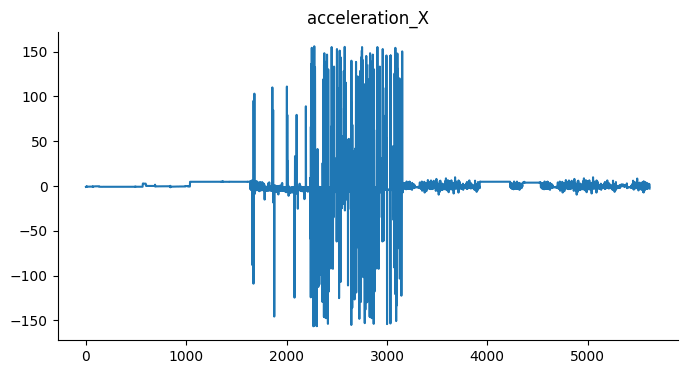

In [23]:
# Graph for the values of acceleration_X
dataset['acceleration_X'].plot(kind='line', figsize=(8, 4), title='acceleration_X')
plt.gca().spines[['top', 'right']].set_visible(False)

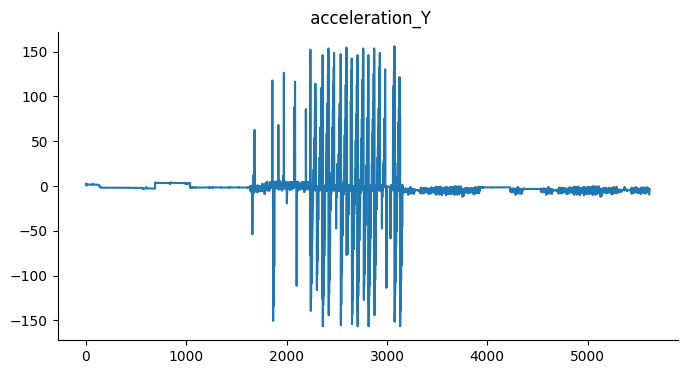

In [24]:
# Graph for the values of acceleration_Y
dataset[' acceleration_Y'].plot(kind='line', figsize=(8, 4), title=' acceleration_Y')
plt.gca().spines[['top', 'right']].set_visible(False)

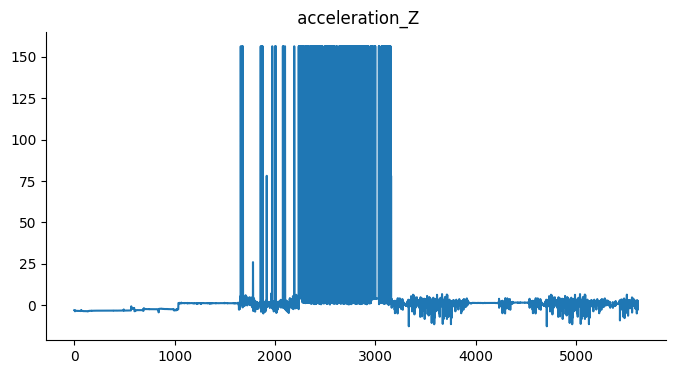

In [25]:
# Graph for the values of acceleration_Z
dataset[' acceleration_Z'].plot(kind='line', figsize=(8, 4), title=' acceleration_Z')
plt.gca().spines[['top', 'right']].set_visible(False)

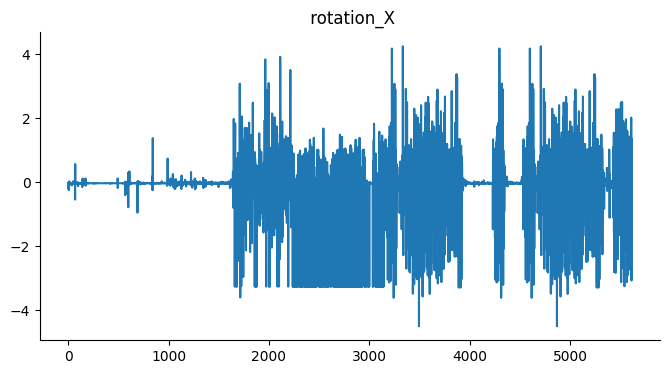

In [26]:
# Graph for the values of rotation_X
dataset[' rotation_X'].plot(kind='line', figsize=(8, 4), title=' rotation_X')
plt.gca().spines[['top', 'right']].set_visible(False)

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# * Building a Feedforward Neural Network*

In [28]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3608 - loss: 1.5802 - val_accuracy: 0.7197 - val_loss: 1.2198
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6480 - loss: 1.2195 - val_accuracy: 0.7419 - val_loss: 1.0012
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6899 - loss: 1.0478 - val_accuracy: 0.7497 - val_loss: 0.8279
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7208 - loss: 0.9066 - val_accuracy: 0.7631 - val_loss: 0.7034
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7581 - loss: 0.7742 - val_accuracy: 0.7964 - val_loss: 0.6191
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7680 - loss: 0.7240 - val_accuracy: 0.7964 - val_loss: 0.5631
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7775 - loss: 0.6735 - val_accuracy: 0.8098 - val_loss: 0.5162
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8107 - loss: 0.5788 - val_accuracy: 0.

In [31]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3593
Test Accuracy: 86.92%


In [32]:
# Save the model
model.save("activity_detection_model.h5")
print("Model saved as activity_detection_model.h5")

Model saved as activity_detection_model.h5


In [33]:
# Example: Predicting activities for test data
#predictions = model.predict(X_test[:5])
#predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))
#print("Predicted Activities:", predicted_labels)
#print("Actual Activities:", label_encoder.inverse_transform(y_test[:5]))

# Building a Random Forest Model

In [34]:
# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [37]:
# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Falling       1.00      0.83      0.91         6
      Laying       0.99      0.99      0.99       225
   Sit-Stand       0.95      0.94      0.94       171
   Stand-Lay       0.93      0.85      0.89       115
    Standing       1.00      1.00      1.00       240
     Walking       0.95      0.99      0.97       367

    accuracy                           0.97      1124
   macro avg       0.97      0.93      0.95      1124
weighted avg       0.97      0.97      0.97      1124

Accuracy: 0.9679715302491103


In [38]:
# Saving the model and encoder for deployment
import joblib
joblib.dump(model, "activity_detection_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

# Building a LSTM Model

In [39]:
from tensorflow.keras.layers import LSTM

# Reshape X for LSTM (assuming a fixed sequence length, e.g., 10 timesteps)
sequence_length = 10

# Convert data into sequences
def create_sequences(data, labels, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - sequence_length + 1):
        X_seq.append(data[i:i + sequence_length])
        y_seq.append(labels[i + sequence_length - 1])  # Label for the last timestep
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [41]:
# Build the LSTM model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(sequence_length, X_train.shape[2]), return_sequences=True),
    Dropout(0.5),
    LSTM(32, activation='tanh', return_sequences=False),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.4609 - loss: 1.4395 - val_accuracy: 0.8942 - val_loss: 0.3393
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9006 - loss: 0.3790 - val_accuracy: 0.9388 - val_loss: 0.2126
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9343 - loss: 0.2578 - val_accuracy: 0.9454 - val_loss: 0.1956
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9371 - loss: 0.2480 - val_accuracy: 0.9577 - val_loss: 0.1678
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9477 - loss: 0.2173 - val_accuracy: 0.9610 - val_loss: 0.1476
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9489 - loss: 0.1943 - val_accuracy: 0.9610 - val_loss: 0.1377
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9517 - loss: 0.1840 - val_accuracy: 0.9633 - val_loss: 0.1386
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9580 - loss: 0.1647 - val_accu

In [44]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9852 - loss: 0.0448
Test Accuracy: 97.95%


In [45]:
# Save the model
model.save("lstm_activity_detection_model.h5")
print("Model saved as lstm_activity_detection_model.h5")

Model saved as lstm_activity_detection_model.h5


In [46]:
# Example: Predicting activities for test data
predictions = model.predict(X_test[:5])
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))
print("Predicted Activities:", predicted_labels)
print("Actual Activities:", label_encoder.inverse_transform(y_test[:5]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
Predicted Activities: [' Laying' ' Standing' ' Walking' ' Sit-Stand' ' Walking']
Actual Activities: [' Laying' ' Standing' ' Walking' ' Sit-Stand' ' Walking']
